In [1]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np

# Monkey-patch: if np.NaN is missing, set it to np.nan
if not hasattr(np, 'NaN'):
    np.NaN = np.nan

version_url = "https://api.beta.ons.gov.uk/v1/datasets/retail-sales-index/editions/time-series/versions/32"
response = requests.get(version_url)
response.raise_for_status()  # Raises an exception for HTTP errors
data = response.json()


# Extract the CSV download URL.
csv_url = data["downloads"]["csv"]["href"]

# Download the CSV data.
csv_response = requests.get(csv_url)
csv_response.raise_for_status()

c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [ ]:
past_forecasts = pd.DataFrame({
    'date': ["2024-01-01"]
})

In [2]:
df = pd.read_csv(StringIO(csv_response.text))

In [ ]:
f

,v4_1,Data Marking,mmm-yy,Time,countries,Geography,sic-unofficial,UnofficialStandardIndustrialClassification,type-of-prices,Prices,seasonal-adjustment,SeasonalAdjustment
0,3.5,NaN,Dec-24,Dec-24,K03000001,Great Britain,all-retailing-excluding-automotive-fuel,All retailing excluding automotive fuel,current-prices-percentage-change-on-same-month...,Current prices - Percentage change on same mon...,seasonal-adjustment,Seasonally Adjusted
1,7.6,NaN,Dec-24,Dec-24,K03000001,Great Britain,non-specialised-stores,Non-specialised stores,current-prices-percentage-change-on-same-month...,Current prices - Percentage change on same mon...,seasonal-adjustment,Seasonally Adjusted
2,1.8,NaN,Dec-24,Dec-24,K03000001,Great Britain,non-store-retailing,Non-store retailing,current-prices-percentage-change-3-months-on-s...,Current prices - Percentage change 3 months on...,seasonal-adjustment,Seasonally Adjusted
3,2.9,NaN,Dec-24,Dec-24,K03000001,Great Britain,non-specialised-stores,Non-specialised stores,current-prices-percentage-change-3-months-on-s...,Current prices - Percentage change 3 months on...,seasonal-adjustment,Seasonally Adjusted
4,-2.5,NaN,Dec-24,Dec-24,K03000001,Great Britain,textile-clothing-and-footwear-stores,"Textile, clothing and footwear stores",current-prices-percentage-change-3-months-on-s...,Current prices - Percentage change 3 months on...,seasonal-adjustment,Seasonally Adjusted
...,...,...,...,...,...,...,...,...,...,...,...,...
44395,NaN,.,Jan-88,Jan-88,K03000001,Great Britain,household-goods-stores,Household goods stores,chained-volume-percentage-change-on-same-month...,Chained volume - Percentage change on same mon...,seasonal-adjustment,Seasonally Adjusted
44396,NaN,.,Jan-88,Jan-88,K03000001,Great Britain,predominantly-food-stores,Predominantly food stores,chained-volume-percentage-change-3-months-on-p...,Chained volume - Percentage change 3 months on...,seasonal-adjustment,Seasonally Adjusted
44397,NaN,.,Jan-88,Jan-88,K03000001,Great Britain,total-of-predominantly-non-food-stores,Total of predominantly non-food stores,chained-volume-percentage-change-3-months-on-p...,Chained volume - Percentage change 3 months on...,seasonal-adjustment,Seasonally Adjusted
44398,NaN,.,Jan-88,Jan-88,K03000001,Great Britain,all-retailing-including-automotive-fuel,All retailing including automotive fuel,chained-volume-percentage-change-on-same-month...,Chained volume - Percentage change on same mon...,seasonal-adjustment,Seasonally Adjusted


In [3]:
df_mom= df[
    (df['type-of-prices']=="chained-volume-percentage-change-on-previous-month") & 
    (df['sic-unofficial']=="all-retailing-including-automotive-fuel")
    ].sort_values('mmm-yy')

df_mom['ds'] = pd.to_datetime('01-' + df_mom['mmm-yy'], format='%d-%b-%y')

<Axes: xlabel='ds', ylabel='y'>

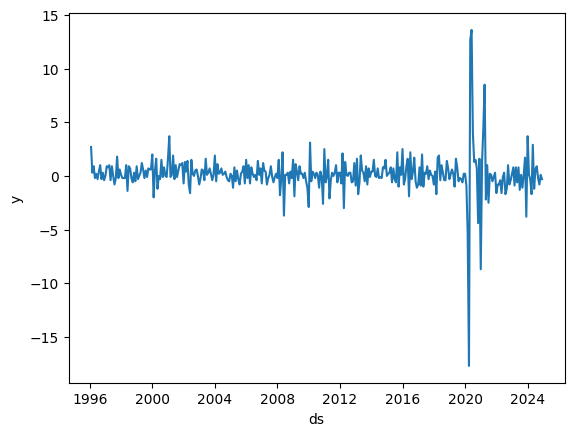

In [4]:
df_agg = df_mom[['ds','v4_1']].copy()
df_agg.columns = ['ds', 'y']


sns.lineplot(data=df_agg, x="ds",y="y")


In [5]:
df_input = df_agg.sort_values('ds').dropna().reset_index(drop=True)

In [15]:
def drop_last_n_months(df, n):
    if n <= 0:
        return df.copy()  # no changes if n is 0 or negative
    return df.iloc[:-n].copy()

trunc_input = drop_last_n_months(df_input, 0)

In [16]:
trunc_input.tail(10)

,ds,y
337,2024-03-01,-0.3
338,2024-04-01,-1.7
339,2024-05-01,2.9
340,2024-06-01,-1.2
341,2024-07-01,0.6
342,2024-08-01,0.9
343,2024-09-01,-0.2
344,2024-10-01,-0.8
345,2024-11-01,0.1
346,2024-12-01,-0.3


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (22) is too small than the required number                     for the learning rate finder (216). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 11. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Finding best initial lr: 100%|██████████| 216/216 [00:01<00:00, 156.27it/s]


Training: |          | 0/? [00:15<?, ?it/s, v_num=18, train_loss=0.0109, reg_loss=0.000, MAE=0.962, RMSE=1.550, Loss=0.011, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._inf


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 493.91it/s] 

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users

,ds,yhat1,y,combined,is_forecast
346,2024-12-01,NaN,-0.3,-0.300000,False
347,2025-01-01,-0.228868,NaN,-0.228868,True
348,2025-02-01,0.121793,NaN,0.121793,True
349,2025-03-01,-0.320148,NaN,-0.320148,True
350,2025-04-01,0.032631,NaN,0.032631,True
351,2025-05-01,0.082511,NaN,0.082511,True
352,2025-06-01,0.062326,NaN,0.062326,True
353,2025-07-01,0.034017,NaN,0.034017,True
354,2025-08-01,-0.160603,NaN,-0.160603,True
355,2025-09-01,-0.241066,NaN,-0.241066,True


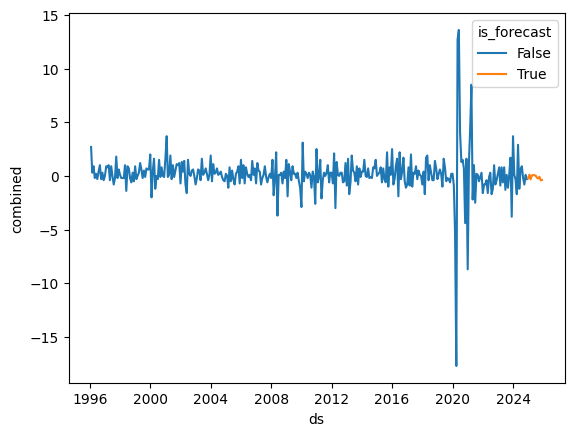

In [17]:
m = NeuralProphet()

metrics = m.fit(trunc_input , freq='MS')

future = m.make_future_dataframe(trunc_input , periods=12)

forecast = m.predict(future)

fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)

merged_df = pd.merge(forecast[['ds', 'yhat1']], trunc_input , on='ds', how='outer')
merged_df['combined'] = merged_df['y'].fillna(merged_df['yhat1'])
merged_df['is_forecast'] = merged_df.y.isna()

merged_df
sns.lineplot(data = merged_df, x='ds',y='combined', hue='is_forecast')

merged_df.tail(13)


In [18]:
merged_df[merged_df.is_forecast].head(1)

,ds,yhat1,y,combined,is_forecast
347,2025-01-01,-0.228868,NaN,-0.228868,True
